# Pi = f0

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from subprocess import call

In [60]:
# Polynomial
def f0_poly3_f0asPi(f0, pi1, pi2, q1, q2, l, mu):
    K, q0 = q2, 1.0
    r1 = q0*(mu/K + (1-mu)/q1)
    r2 = q0*(mu/K + (1-mu)/q2)
    # a f0**3 + b f0**2 + c f0 + d = 0
    a = -l**2 + (pi1+pi2)*l*(1-l)
    b = l**2 + l*(r1+r2) - (1-l)*(pi1*r1+pi2*r2)
    c = -l*(r1 + r2) - r1*r2
    d = r1*r2
    return a*f0**3 + b*f0**2 + c*f0 + d

# ----------------------- Solution to the polynomial ------------------------------
def f0_poly3_sols_f0asPi(pi1, pi2, q1, q2, l, mu):
    # r1, r2 = 1/q1, 1/q2
    K, q0 = q2, 1.0
    r1 = q0*(mu/K + (1-mu)/q1)
    r2 = q0*(mu/K + (1-mu)/q2)
    if l > 0.0:
        # global pi1, pi2, q1, q2, r1, r2, l
        # a f0**3 + b f0**2 + c f0 + d = 0
        a = -l**2 + (pi1+pi2)*l*(1-l)
        b = l**2 + l*(r1+r2) - (1-l)*(pi1*r1+pi2*r2)
        c = -l*(r1 + r2) - r1*r2
        d = r1*r2
        # step 1: delta0 and elta 1
        delta0 = b**2 - 3*a*c
        delta1 = 2*b**3 - 9*a*b*c + 27*a**2*d
        # step 2: computation of C:
        if delta0 == 0.0 and delta1 != 0.0:
            C = delta1**(1/3) # cubic_root[(delta1 + sqrt(delta1**2+0))/2]
        elif delta0 == 0.0 and delta1 == 0.0:
            C = 1.0 # so in the next step delta0/C yields 0.0 instead of NaN (0.0/0.0)
        else:
            radicand0 = delta1**2 - 4*delta0**3
            if radicand0 < 0:
                root0 = complex(0,math.sqrt(-1*radicand0))
            else:
                root0 = complex(math.sqrt(radicand0),0)
            radicand1 = (delta1 + root0)/2
            C = radicand1**(1/3)
        # 3: Final solution
        ksi = complex(-1, math.sqrt(3))/2
        f0_roots, f0_roots_abs = [], []
        for k in range(3):
            f0_root = -1/(3*a)*(b + ksi**k*C + delta0/(C*ksi**k))
            f0_roots.append(f0_root), f0_roots_abs.append(abs(f0_root))
        return f0_roots_abs # I'm taking the abs to get the real part (make sure i'm not losing negative sols...)
    else: # l == 0.0
        sqrtVal = math.sqrt(1+4*(pi1/r1 + pi2/r2))
        f0_roots = [(-1+sqrtVal)/(2*(pi1/r1 + pi2/r2)), (-1-sqrtVal)/(2*(pi1/r1 + pi2/r2))]
        return f0_roots


# ----------------------- Rest of the populations ------------------------------
def f_i(i, f0, pis, qs, l, mu):
    # global qs, rs, pis, l
    # rs = [1/q for q in qs]
    K, q0 = qs[-1], 1.0
    rs = [q0*(mu/K + (1-mu)/q) for q in qs]
    try:
        fi = pis[i-1]*(1-l)*f0**2/(rs[i-1]-l*f0)
    except ZeroDivisionError:
        fi = float('nan') 
    # return (1-l)*pis[i-1]/(rs[i-1]/f0-l)
    return fi

# A peek to the solutions and the shape of the polynomial...

In [73]:
pi = 1.0 # factor multiplicatiu a f0...
q1, q2 = 9.0, 10.0
l = 2/3+0.05
mu = 0.0
f0s = f0_poly3_sols_f0asPi(pi, pi, q1, q2, l, mu)
# print(f0s)

for f0 in f0s:
    fs = [f_i(i, f0, (pi, pi), (q1, q2), l, mu) for i in range(1,3)]
    print(f0, *fs)

5.34999277082558 -2.178237090780556 -2.1717556800450235
0.1289258522563543 0.25165482321145644 0.6194193245325055
0.14984968010497202 1.7108099782423696 -0.8606596583488176


In [52]:
f0vals = np.arange(0.0,1.001,0.001)
pis_mod = np.arange(0.1,1.1,0.1)
pis_mod = np.around(pis_mod, 1)
f0polyVals_pi = {}
for pi in pis_mod:
    f0polyVals = f0_poly3_f0asPi(f0vals, pi, pi, q1, q2, l, mu)
    f0polyVals_pi[pi] = f0polyVals

[(-0.01, 0.01), (0.0, 0.2)]

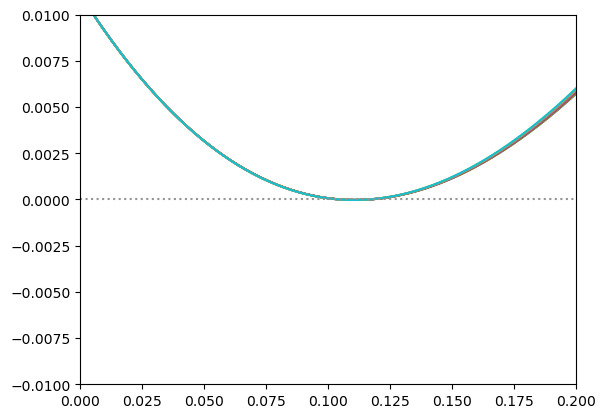

In [58]:
fig, ax = plt.subplots()
for pi in pis_mod:
    ax.plot(f0vals, f0polyVals_pi[pi])
ax.axhline(0.0, 0, 1, ls=':', color='xkcd:gray')
# ax.set(ylim=(-0.05,0.05))
ax.set(ylim=(-0.01,0.01), xlim=(0.0, 0.2))

## there is a value of lambda where f0 has only two solutions...

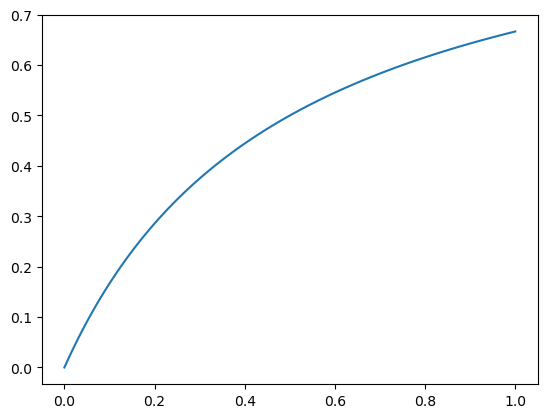

In [70]:
pis = np.arange(0.0,1.01, 0.01)
lprima = [2*x/(1+2*x) for x in pis]

fig, ax = plt.subplots()
ax.plot(pis, lprima)

# Let's compare this new approach to the old fixed pis

In [33]:
q1, q2 = 9.0, 10.0
ls = np.arange(0.0, 1.0, 0.05)
ls = np.around(ls, 2)
# get model results with pi results:
sols_pi = {}
pis_original = [0.1, 0.3]
for pi in pis_original:
    sols_pi[pi] = [[], [], []]
    # sols_l_original = [[], [], []]
    pi1, pi2 = pi, pi
    for l in ls:
        call(f'python ../det_sols_from_polynomial/f0poly_sols_clean.py {pi1} {pi2} {q1} {q2} {l} -v > sols.dat', shell=True)
        sols = []
        with open('sols.dat', 'r') as file:
            for line in file.readlines():
                sols_i = [float(f) for f in line.split()]
                sols.append(sols_i)
        sol_index=0 if l==0.0  else 1 
        for i in range(3):
            sols_pi[pi][i].append(sols[sol_index][i])

In [50]:
pis_mod = np.arange(0.1,1.1,0.1)
pis_mod = np.around(pis_mod, 1)
print(pis_mod)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [68]:
pis_mod = np.arange(0.1,1.1,0.1)
pis_mod = np.around(pis_mod, 1)
sols_pimod = {}
for pi in pis_mod:
    sols_l_pif0 = [[], [], []]
    # print(pi)
    for l in ls:
        # print(l)
        f0s = f0_poly3_sols_f0asPi(pi, pi, q1, q2, l, mu=0.0)
        validSols = []
        # print(f0s)
        for f0 in f0s:
            validSol = True
            if f0 > 1.0 or f0 < 0.0:
                validSol = False
            else:
                fis = [f_i(i, f0, (pi, pi), (q1, q2), l, mu=0.0) for i in range(1,3)]
                for fi in fis:
                    if fi < 0.0 or fi > 1.0:
                        validSol = False
                if validSol and round(sum(fis)+f0,4) > 1.0:
                    validSol = False
                    # print(f0, fis, sum(fis)+f0)
            if validSol:
                validSols.append([f0, fis[0], fis[1]])
        if len(validSols) > 1:
            print(f'More than one solution found!!! lambda = {l}')
            print(validSols)
        sols_l_pif0[0].append(validSols[0][0])
        sols_l_pif0[1].append(validSols[0][1])
        sols_l_pif0[2].append(validSols[0][2])
    sols_pimod[pi] = sols_l_pif0

0.1
0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.2
0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.3
0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.4
0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.5
0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5


/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_1008/281610704.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  f0_root = -1/(3*a)*(b + ksi**k*C + delta0/(C*ksi**k))
/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_1008/281610704.py:46: RuntimeWarning: invalid value encountered in scalar multiply
  f0_root = -1/(3*a)*(b + ksi**k*C + delta0/(C*ksi**k))


IndexError: list index out of range

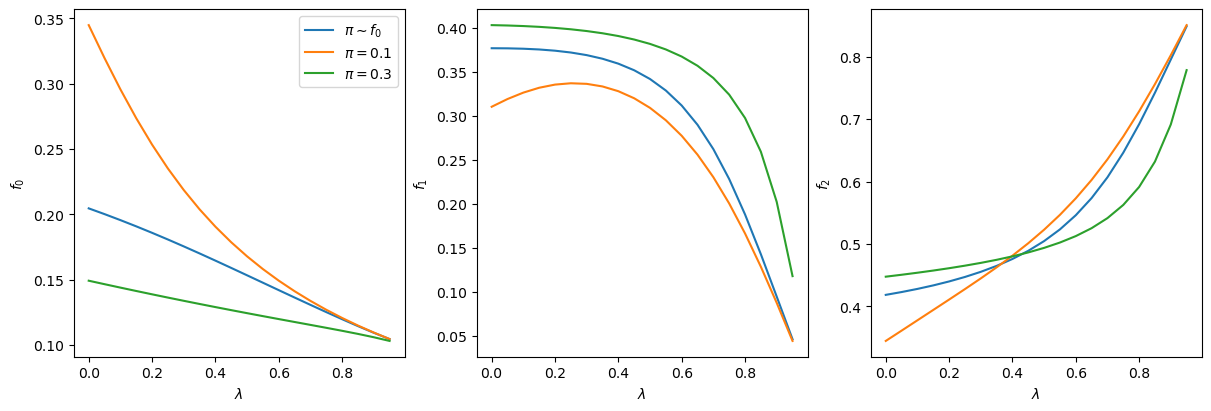

In [49]:
fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)

for i in range(3):
    if i == 0:
        ax[i].plot(ls, sols_l_pif0[i], label=r'$\pi \sim f_0$')
        ax[i].plot(ls, sols_pi[0.1][i], label='$\pi = 0.1$')
        ax[i].plot(ls, sols_pi[0.3][i], label='$\pi = 0.3$')
    else:
        ax[i].plot(ls, sols_l_pif0[i])
        ax[i].plot(ls, sols_pi[0.1][i])
        ax[i].plot(ls, sols_pi[0.3][i])
    ax[i].set_xlabel(r'$\lambda$')
    ax[i].set_ylabel(fr'$f_{i}$')
ax[0].legend()